# <div align="right">Machine Learning
### <div align="right"> *Followblindly*

# 6 - Fisher’s Linear Discriminant Analysis

**Fisher's Linear Discriminant Analysis (FDA)** is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs. The general FDA approach is very similar to a Principal Component Analysis, but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes.

Assume we have only 2 classes. The idea behind Fisher’s Linear Discriminant Analysis is to reduce the dimensionality of the data to one dimension. That is, to take d-dimensional $x\in \mathbf{R}^{d}$ and map it to one dimension by finding $w^{T}x$ where:

$$z = w^{T}x= 
\begin{bmatrix}
w_{1} ... w_{d}   \\
\end{bmatrix}
\begin{bmatrix}
x_{1}    \\
...      \\
x_{d}    \\
\end{bmatrix} = \sum_{i=1}^{d}w_{i}x_{i}
$$

The one-dimensional $z$ is then used for classification.

**Goal:** To find a direction such that projected data $w^{T}x$ are well separated.

Consider the two-class problem:

$$
\mu_{0}=\frac{1}{n_{0}}\sum_{i:y_{i}=0}x_{i} \ \ \ \ \ \ \ \ \ \ \ \ \mu_{1}=\frac{1}{n_{1}}\sum_{i:y_{i}=0}x_{i}
$$

We want to:

1. **Maximize the distance between projected class means.**

2. **Minimize the within class variance.**

The distance between projected class means is:

$$
\begin{align*}
(w^{T}\mu_{0} - w^{T}\mu_{1})^{2} &= (w^{T}\mu_{0} - w^{T}\mu_{1})^{T}(w^{T}\mu_{0} - w^{T}\mu_{1}) \\
&= (\mu_{0}-\mu_{1})^{T}ww^{T}(\mu_{0}-\mu_{1}) \\
&=w^{T}(\mu_{0}-\mu_{1})(\mu_{0}-\mu_{1})^{T}w \\
&= w^{T}S_{B}w
\end{align*}
$$
where $S_{B}$ is the between-class variance (known).

Minimizing the within-class variance is equivalent to minimizing the sum of all individual within-class variances.
Thus the within class variance is:

$$
\begin{align*}
w^{T}\Sigma_{0}w+w^{T}\Sigma_{1}w &= w^{T}(\Sigma_{0}+\Sigma_{1})w \\
&= w^{T}S_{W}w
\end{align*}
$$

where $S_{W}$ is the within-class covariance (known).

To maximize the distance between projected class means and minimize the within-class variance, we can maximize the ratio:

$$
max_{w} \ \frac{w^{T}S_{B}w}{w^{T}S_{W}w}
$$

Note that the numerator is unbounded since we can make any arbitary $w^{T}$. But since we are only interested in direction, length is not important. Therefore we can fix the length of $w$ (i.e. unit length) and find the direction. This is equivalent to finding:

$$
max_{w} \ w^{T}S_{B}w \\
Subject \ \ to \ \ w^{T}S_{W}w = 1
$$

To turn this constraint optimization problem into a non-constranst optimization problem, we apply **Lagrange multipliers:**

$$
L(w,\lambda) = w^{T}S_{B}w - \lambda(w^{T}S_{W}w-1)
$$
Differentiating with respect to $w$ we get:
$$
\frac{\partial L}{\partial w} = 2S_{B} w - \lambda2S_{W} w = 0 \\
S_{B} w = \lambda S_{W}w
$$

This is a generalized eigenvector problem that is equivalent to (if $S_{W}$ is not singular):

$$
S_{W}^{-1}S_{B}w = \lambda w
$$

where $\lambda$ and $w$ are the eigenvalues and eigenvectors of $S^{−1}_{W}S_{B}$respectively. $w$ is the eigenvector corresponding to the largest eigenvalue of $S^{−1}_{W}S_{B}$.

In fact, for two-classes problems, there exists a **simpler solution**. Recall that $S_{B}w = (\mu_{0}-\mu_{1})(\mu_{0}-\mu_{1})^{T}w$ where $(\mu_{0}-\mu_{1})^{T}w$ is a scalar. Therefore $S_{B}w\propto(\mu_{0}-\mu_{1})$. That is, $S_{B}w$ is on the same direction as $(\mu_{0}-\mu_{1})$. Since $S_{W}^{-1}S_{B}w = \lambda w$, we get:

$$
S_{w}^{-1}(\mu_{0}-\mu_{1}) \propto w
$$

which gives us the direction.

## Fisher’s Linear Discriminant Analysis For Multiple Classes

We have defined $\varepsilon(w)=\frac{w^{T}S_{B}w}{w^{T}S_{W}w}$ that needs to be maximized. $w$ is the largest eigen vectors of $S_{W}^{-1}S_{B}$. For two classes, $w \propto S_{w}^{-1}(\mu_{0}-\mu_{1})$. For $k$-class problem, Fisher Discriminant Analysis involves $(k − 1)$ discriminant functions. Make $W_{d×(K−1)}$ where each column describes a discriminant. So now, we have to update the two notions we have defined for a $2$-class problem, $S_{B}$ and $S_{W}$ .

$$
S_{w}=\sum_{i=1}^{K}\Sigma_{i}
$$

$S_{B}$ generalization to multiple classes in not obvious. We will define the total variance $S_{T}$ as the sum of the within class variance and between classes variance.

$$
S_{T} = S_{B}+S_{W}
$$

Where $S_{T}=\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\mu)(x_{i}-\mu)^{T}$ and $\mu=\frac{1}{n}\sum_{i=1}^{n}x_{i}$. So,

$$
S_{B} = S_{T}-S_{W}
$$

It can be shown that $W$ is the first $(k − 1)$ eigen vectors of $S^{−1}_{W}S_{B}$.

## Implementing FDA from scratch

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
from sklearn.preprocessing import LabelEncoder

X = iris[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].values
y = iris['Species'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1:'Iris-setosa',2:'Iris-versicolor',3:'Iris-virginica'}

$$
X = 
\begin{bmatrix}
x_{1_{SLCm}} \ \ x_{1_{SWCm}} \ \  x_{1_{PLCm}} \ \  x_{1_{PWCm}} \ \   \\
x_{2_{SLCm}} \ \ x_{2_{SWCm}} \ \  x_{2_{PLCm}} \ \  x_{2_{PWCm}} \ \   \\
... \\
x_{150_{SLCm}} \ \ x_{150_{SWCm}} \ \  x_{150_{PLCm}} \ \  x_{150_{PWCm}} \ \   \\
\end{bmatrix}_{150x4}, \
Y =
\begin{bmatrix}
\omega_{Species} \\
... \\
\omega_{Species} \\
\end{bmatrix}_{150x1}
$$

### 1. Computing the d-dimensional mean vectors

We will start off with a simple computation of the mean vectors $m_{i}, (i=1,2,3)$ of the 3 different classes:

$$
m_{i} = 
\begin{bmatrix}
\mu_{\omega_{i}}(SLCm)    \\
\mu_{\omega_{i}}(SWCm)    \\
\mu_{\omega_{i}}(PLCm)    \\
\mu_{\omega_{i}}(PWCm)    \\
\end{bmatrix},
\ with \ \ i=1,2,3
$$

In [38]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



### 2. Within-class scatter matrix $S_{W}$

The within-class scatter matrix $S_{W}$ is computed by the following equation:

$$
S_{w}=\sum_{i=1}^{K}\Sigma_{i}
$$

Where $\Sigma_{i} = \sum_{i=1}^{n}(x-\mu){i})(x-\mu_{i})^{T}$ (scatter matrix for every class) and $\mu_{i}=\frac{1}{n_{i}}\sum_{i=1}^{n_{i}}x_{k}$ is the mean vector.

In [39]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


### 3. Between-class scatter matrix $S_{B}$

The between-class scatter matrix $S_{B}$ is computed by the following equation:

$$
S_{B} = \sum_{i=1}^{n}N_{i}(\mu-\mu_{i})(\mu-\mu_{i})^{T}
$$

where $\mu$ is the overall mean, and $\mu_{i}$ and $N_{i}$ are the sample mean and sizes of the respective classes.

In [40]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


### 4. Solving the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_{B}$

In [41]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)  

### 5. Sorting the eigenvectors by decreasing eigenvalues

In [42]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972981
0.27756686384003953
1.1483362279322388e-14
3.422458920849769e-15


### 6. Choosing k eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our $d$×$k$-dimensional eigenvector matrix $W$ (here 4×2: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [43]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2049 -0.009 ]
 [-0.3871 -0.589 ]
 [ 0.5465  0.2543]
 [ 0.7138 -0.767 ]]


### 7. Transforming the samples onto the new subspace

We use the 4×2-dimensional matrix $W$ that we just computed to transform our samples onto the new subspace via the equation: 

$$
Y=X \times W
$$

In [44]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

In [56]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

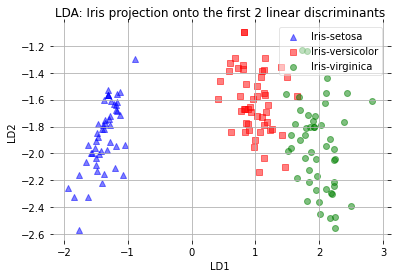

In [57]:
plot_step_lda()

## Implementing FDA from scratch

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [54]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

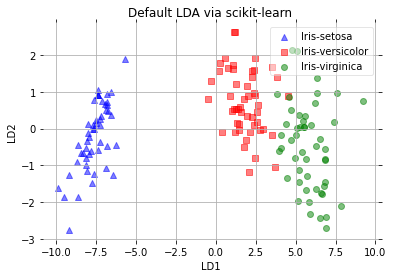

In [55]:
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

## PCA vs. LDA

Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.

Although it might sound intuitive that LDA is superior to PCA for a multi-class classification task where the class labels are known, this might not always the case.

<img src="6_images/6_PCA_vs_LDA.PNG" width=800px/>

In [64]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

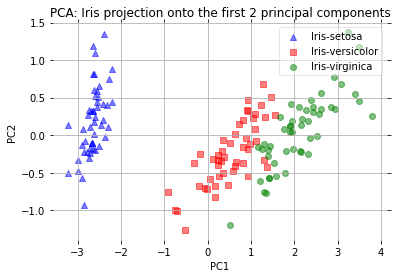

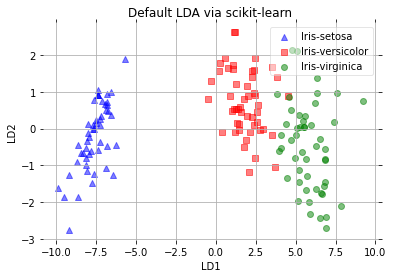

In [65]:
plot_pca()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

## Reference

[1]$\ \ \ \$Raschka, S. (2014, August 3). Linear Discriminant Analysis. Dr. Sebastian Raschka. https://sebastianraschka.com/Articles/2014_python_lda.html. 